In [3]:
import os
import pandas as pd

In [4]:
path = "E:/Learning/MachineLearning/UsedCarPricePrediction/Dataset/"

In [5]:
df = pd.read_csv(os.path.join(path,"vehicles.csv"))

In [6]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [7]:
xdf = df.copy()

# Data Cleaning

## Outliers

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
xdf.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


First we need to remove the outliers of prices. See the output from xdf.describe(), the price ranges between 25% to 75% quantile of our dataset is 4400 ~ 17926, but the maximum price is 4.3 * 10 ^ 9, which is too high for a price!

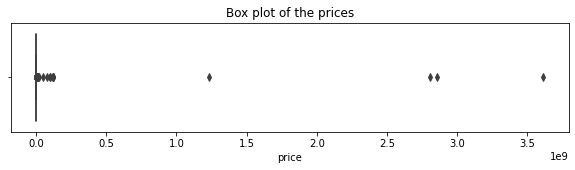

In [10]:
fig, ax = plt.subplots(figsize = (10,2))
ax.set_title('Box plot of the prices')
sns.boxplot(x = 'price', data = xdf);

There indeed are some extremely large prices in our box plot. They are too large for us to actually see the "box". We have to remove them. The common way to remove the outliers is using <b> interquartile range </b> showing below.

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR




In [12]:
filter = (xdf['price'] >= min) & (xdf['price'] <= max)
init_size = df.count()['id']
xdf = xdf.loc[filter]  
filtered_size = xdf.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

12806 ( 2.79 % ) outliers removed from dataset


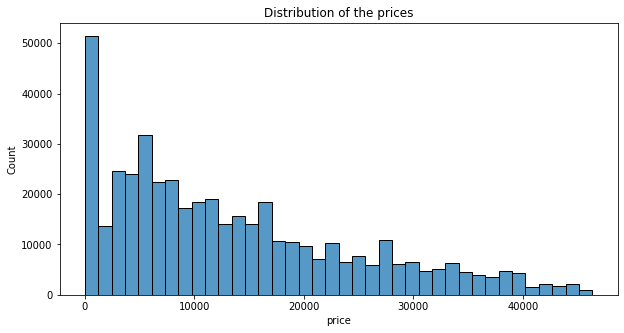

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Distribution of the prices')
sns.histplot(xdf['price'], bins = 38, kde = False);

We can see that there are large number of "free cars" in our dataset. We have to remove them as well

Here we set a threshold of <b> $600

In [14]:
xdf = xdf[xdf['price']> 600]

Now let's see the outliers in the <b> odometer

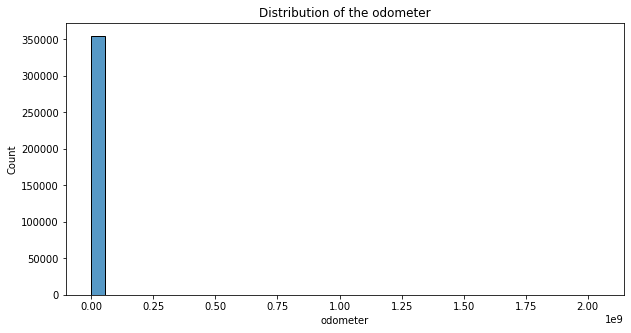

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Distribution of the odometer')
sns.histplot(xdf['odometer'], bins = 38, kde = False);

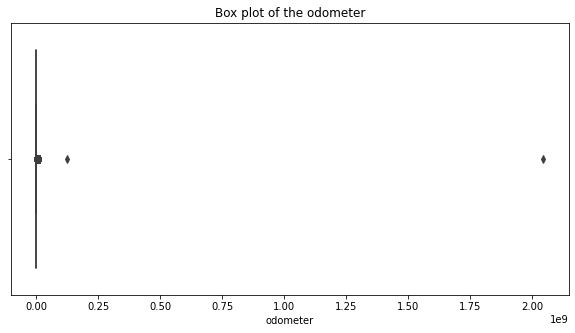

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Box plot of the odometer")
sns.boxplot(x = 'odometer', data = xdf);

Same problem happends to the odometer column.

In [17]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

In [18]:
filter = (xdf['odometer'] <= max)
init_size = xdf.count()['id']
xdf = xdf.loc[filter]

filtered_size = xdf.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

48730 ( 12.19 % ) outliers removed from dataset


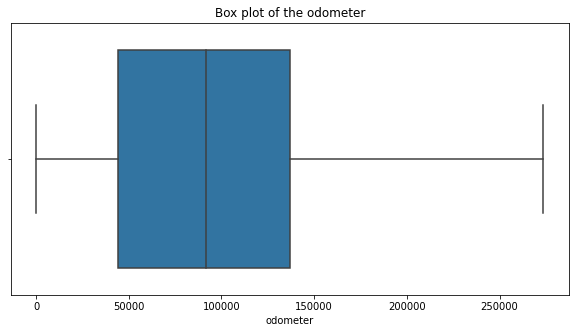

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Box plot of the odometer")
sns.boxplot(x = 'odometer', data = xdf);

### 3.2 Uncorrelated Columns

Next we need to drop some uncorrelated columns. They are columns that we are pretty sure having no correlations to the car prices. This include the <b> id, url, region, region_url, title_status, VIN, image_url, description, country </b> (as it is an empty column). As for its state and cordinate, we need to make sure they don't have high correlatino to the price

In [20]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351122 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    351122 non-null  int64  
 1   id            351122 non-null  int64  
 2   url           351122 non-null  object 
 3   region        351122 non-null  object 
 4   region_url    351122 non-null  object 
 5   price         351122 non-null  int64  
 6   year          350431 non-null  float64
 7   manufacturer  340794 non-null  object 
 8   model         348652 non-null  object 
 9   condition     222320 non-null  object 
 10  cylinders     236974 non-null  object 
 11  fuel          348831 non-null  object 
 12  odometer      351122 non-null  float64
 13  title_status  349518 non-null  object 
 14  transmission  349680 non-null  object 
 15  VIN           225442 non-null  object 
 16  drive         264142 non-null  object 
 17  size          110883 non-null  object 
 18  type

In [21]:
xdf = xdf.drop(columns = ['id', 'url', 'region', 'region_url', 'title_status', 'VIN', 'image_url', 'description', 'state', 'long', 'lat', 'posting_date'])

In [22]:
xdf.shape

(351122, 14)

In [23]:
df.shape

(458213, 26)

### 3.3 Filling Null values

In [24]:
xdf.isnull().sum()

Unnamed: 0           0
price                0
year               691
manufacturer     10328
model             2470
condition       128802
cylinders       114148
fuel              2291
odometer             0
transmission      1442
drive            86980
size            240239
type             66596
paint_color      86087
dtype: int64

In [25]:
xdf_man = xdf['manufacturer'].to_frame()

In [26]:
xdf = xdf.drop(columns = ['manufacturer'])

As we can see there are lots of missing data. There are 11 missing values. As well as dropping unnecessary columns

Now let's check the distribution of the null values among all columns

<AxesSubplot:title={'center':'Distribution of the missing values (yellow records)'}>

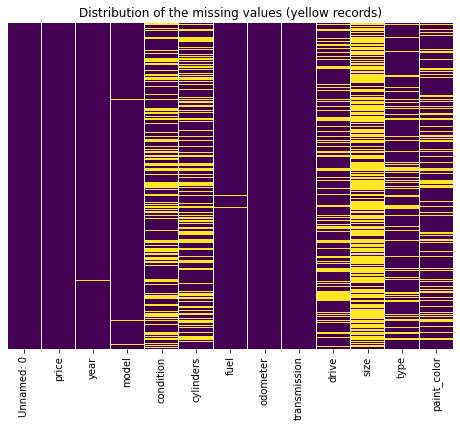

In [27]:
fig, ax = plt.subplots(figsize= (8,6))
ax.set_title('Distribution of the missing values (yellow records)')
sns.heatmap(xdf.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Based on the situation that there are plenty of null values in our dataset, and the fact that these missing values are <b> hard to fill with proper guesses </b>, we decide to take the following three actions:

1. For columns that have too much missing values, we remove the whole colume eg. size
2. For columns that have very few missing values, we remove the whole corresponding rows (for column "year","manufacturer","model","fuel","transmission","drive","type","paint_color")
3. For columns that have <b> intermediate number of missing values </b>, such as "condition" and "cylinders", we choose to <b> to keep the missing values and assign them another unique category called "null" </b>

In [28]:
xdf = xdf.drop(columns = ['size'])

In [29]:
rm_rows = ['year','model','fuel','transmission','drive','type','paint_color']

for column in rm_rows:
    xdf = xdf[~xdf[column].isnull()]

In [30]:
xdf = xdf.replace(np.nan,'null', regex = True)

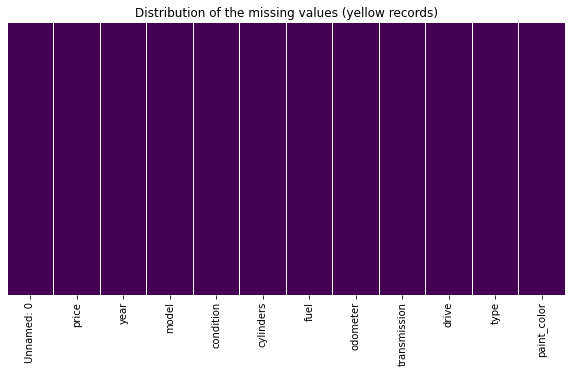

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Distribution of the missing values (yellow records)')
sns.heatmap(xdf.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

### 3.4 Remove samples based on common sense


Let's first see the relationship between <b>prices</b> and <b>mileages (odometer) </b>

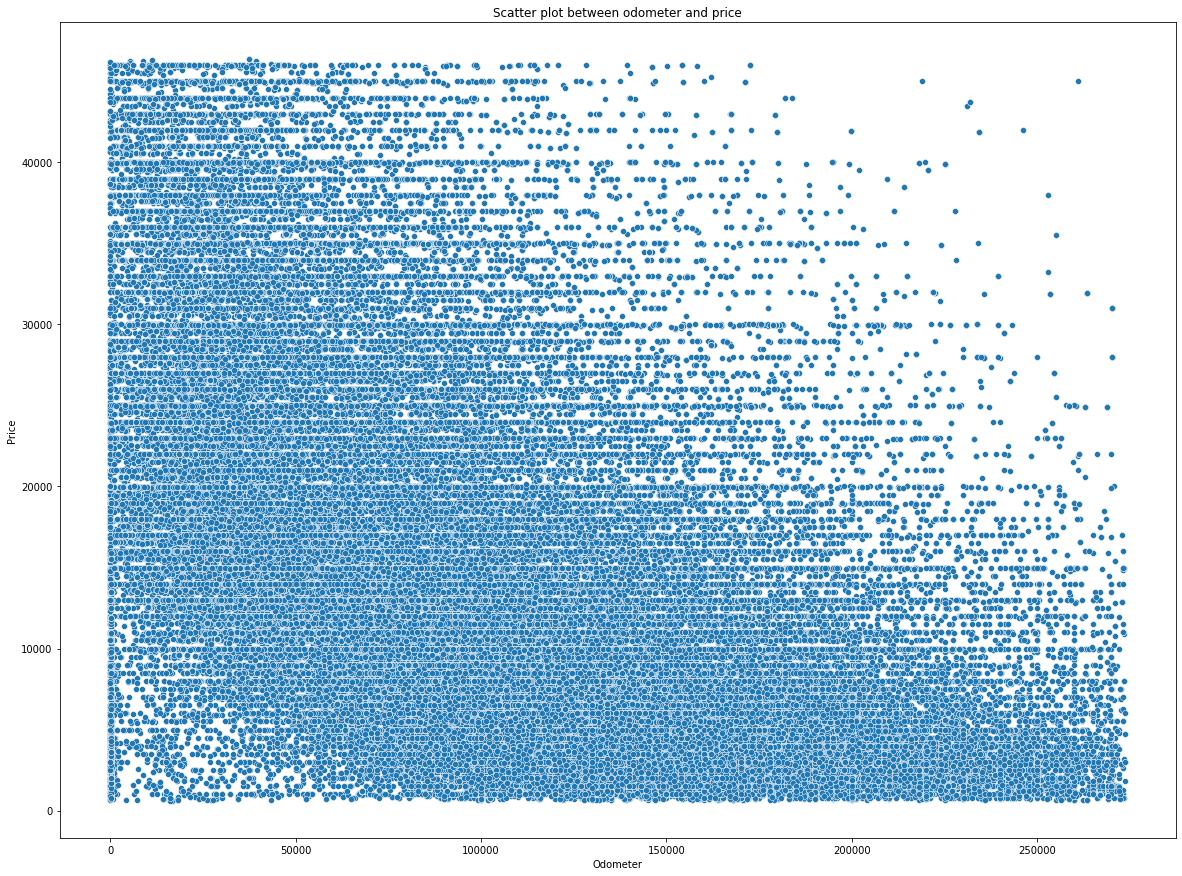

In [32]:
fig, ax = plt.subplots(figsize = (20,15))
ax.set_title("Scatter plot between odometer and price")
plt.xlabel("Odometer")
plt.ylabel("Price")
sns.scatterplot(x = 'odometer', y = 'price', data = xdf);

Higher odometer tends to have lower prices, while lower odometer tends to be more expensive. 

However, there are some <b> relatively new cars were sold nearly for free </b> which is against common sense. Thus we need to do some intervention to it.

In [33]:
xdf = xdf[(xdf['price'] + xdf['odometer']) > 5000]

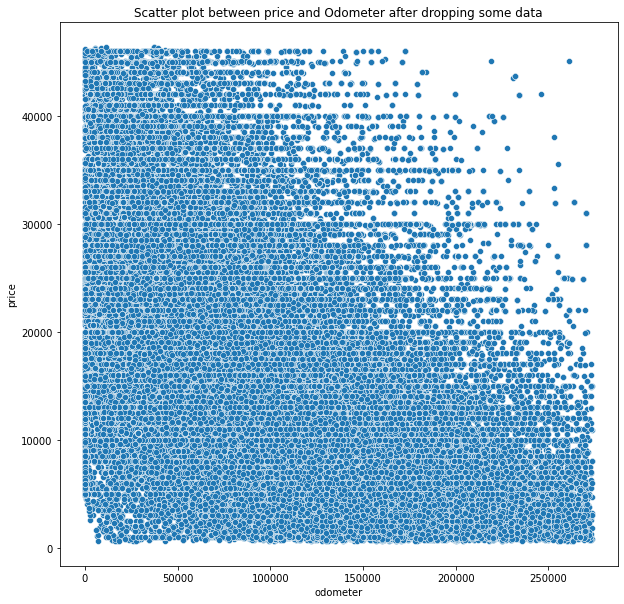

In [34]:
fig,ax = plt.subplots(figsize = (10,10))
plt.title("Scatter plot between price and Odometer after dropping some data")
sns.scatterplot( y = 'price', x = 'odometer', data = xdf);

Also Cars that are too old (let's say earlier than 1960) will increase uncertainty to our data prediction, because of the insufficient amount and probably unstable prices (some of them can be regarded as antiques). So we remove the samples older than 1960

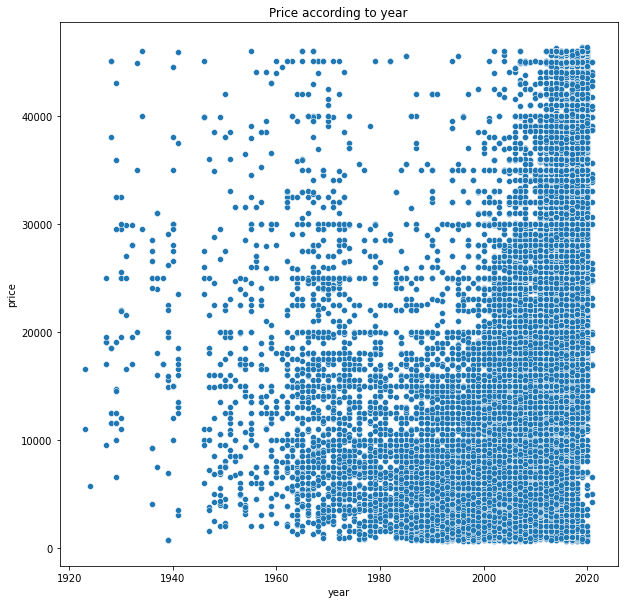

In [35]:
fig,ax = plt.subplots(figsize = (10,10))
plt.title("Price according to year")
sns.scatterplot(x = 'year', y = 'price', data = xdf);

In [36]:
xdf = xdf[xdf['year']> 1960]

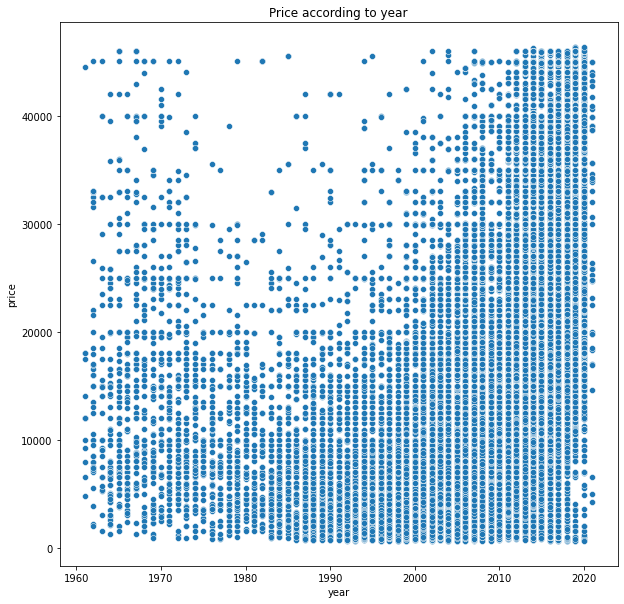

In [37]:
fig,ax = plt.subplots(figsize = (10,10))
plt.title("Price according to year")
sns.scatterplot(x = 'year', y = 'price', data = xdf);

### 3.5 Remove insufficient records

In [38]:
xdf_man['manufacturer'].value_counts()

ford               58498
chevrolet          48438
toyota             31069
honda              20577
nissan             18620
jeep               16901
ram                12818
gmc                12409
dodge              12333
bmw                10434
subaru              9113
volkswagen          8851
hyundai             8693
mercedes-benz       8287
kia                 6894
lexus               5974
chrysler            5933
cadillac            5399
mazda               4973
buick               4768
audi                4645
acura               3265
infiniti            3034
lincoln             2635
pontiac             2300
volvo               2298
mini                2042
mitsubishi          1810
porsche             1306
mercury             1272
rover               1238
saturn              1174
jaguar               836
fiat                 813
tesla                781
alfa-romeo           161
harley-davidson      123
datsun                40
land rover            19
aston-martin          17


Some brands have <b> too few samples </b>
We remove the manufacturers, which hold <b> less than 100 records </b>

In [39]:
rm_brands = ['harley-davidson','alfa-romeo','datsun','tesla','land rover','porsche','aston-martin','ferrari']

for brand in rm_brands:
    xdf_man = xdf_man[~(xdf_man['manufacturer']== brand)]

Now let's head to the car models. For the precision of our future model, we choose to remove the <b> car models which have less than 50 samples. </b> It will narrow the capacity of our model, but in return lower the bias and variance.

In [40]:
xdf = xdf.groupby('model').filter(lambda x: len(x) > 50)

In [41]:
xdf['model'].value_counts()

f-150               3556
silverado 1500      2574
camry               1909
1500                1822
escape              1704
                    ... 
f150 regular cab      51
civic sdn             51
sierra 1500 sle       51
320i                  51
explorer sport        51
Name: model, Length: 620, dtype: int64

# Model Preparation




,

## Encoding categorical features

We transform the string values in all categorical features into numeric values using <b> One Hot Encoding scheme <b>

In [42]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136282 entries, 7 to 458211
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    136282 non-null  int64  
 1   price         136282 non-null  int64  
 2   year          136282 non-null  float64
 3   model         136282 non-null  object 
 4   condition     136282 non-null  object 
 5   cylinders     136282 non-null  object 
 6   fuel          136282 non-null  object 
 7   odometer      136282 non-null  float64
 8   transmission  136282 non-null  object 
 9   drive         136282 non-null  object 
 10  type          136282 non-null  object 
 11  paint_color   136282 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 13.5+ MB


In [43]:
cate_column = ['model','condition','cylinders','fuel','transmission','drive','type','paint_color']

for column in cate_column:
    column = pd.get_dummies(xdf[column], drop_first = True)
    xdf = pd.concat([xdf, column], axis = 1)

xdf = xdf.drop(columns = cate_column)

In [44]:
xdf.head()

,Unnamed: 0,price,year,odometer,1500 4x4,1500 big horn,1500 classic,1500 classic crew cab slt,1500 crew cab,1500 crew cab big horn,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
7,7,41990,2012.0,2778.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,10,27500,2012.0,189000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,11,36990,2013.0,50956.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,14,4900,2003.0,177000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,16,33990,2012.0,49245.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
xdf = xdf.drop(xdf.columns[0], axis =1)

In [46]:
xxdf = xdf.copy()

In [47]:
xxdf.head()

,price,year,odometer,1500 4x4,1500 big horn,1500 classic,1500 classic crew cab slt,1500 crew cab,1500 crew cab big horn,1500 crew cab rebel pickup,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
7,41990,2012.0,2778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,27500,2012.0,189000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,36990,2013.0,50956.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,4900,2003.0,177000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,33990,2012.0,49245.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Normalization

We also need to normalize the values in the numerical features ("year" and "odometer"), as they do not have the same scale as the other newly created columns.

In [48]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [49]:
std_scaler = StandardScaler()

for column in ['year', 'odometer']:
    xdf[column] = std_scaler.fit_transform(xdf[column].values.reshape(-1,1))

In [50]:
xdf.head()

,price,year,odometer,1500 4x4,1500 big horn,1500 classic,1500 classic crew cab slt,1500 crew cab,1500 crew cab big horn,1500 crew cab rebel pickup,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
7,41990,-0.002573,-1.578448,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,27500,-0.002573,1.611084,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,36990,0.176070,-0.753276,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,4900,-1.610358,1.405553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,33990,-0.002573,-0.782581,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
## Split traing and testing set

X_train, X_test , y_train, y_test = train_test_split(xdf.drop('price', axis = 1), xdf['price'], test_size = 0.30, random_state = 141)

### Models and tuning

We are going to create and train several machine learning models to see their performance in this used car dataset for price prediction.

We use <b> R2 score </b> and <b> root mean squarred error </b> as the way to evaluate our models

In [53]:
model_score = pd.DataFrame(columns = ("r2","rmse"))

### Linear Regression


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [135]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

For the linear regressor, the root mean square error for the testing set is: 4105.138070970149
The r2 score for the testing set is: 0.852243522019521


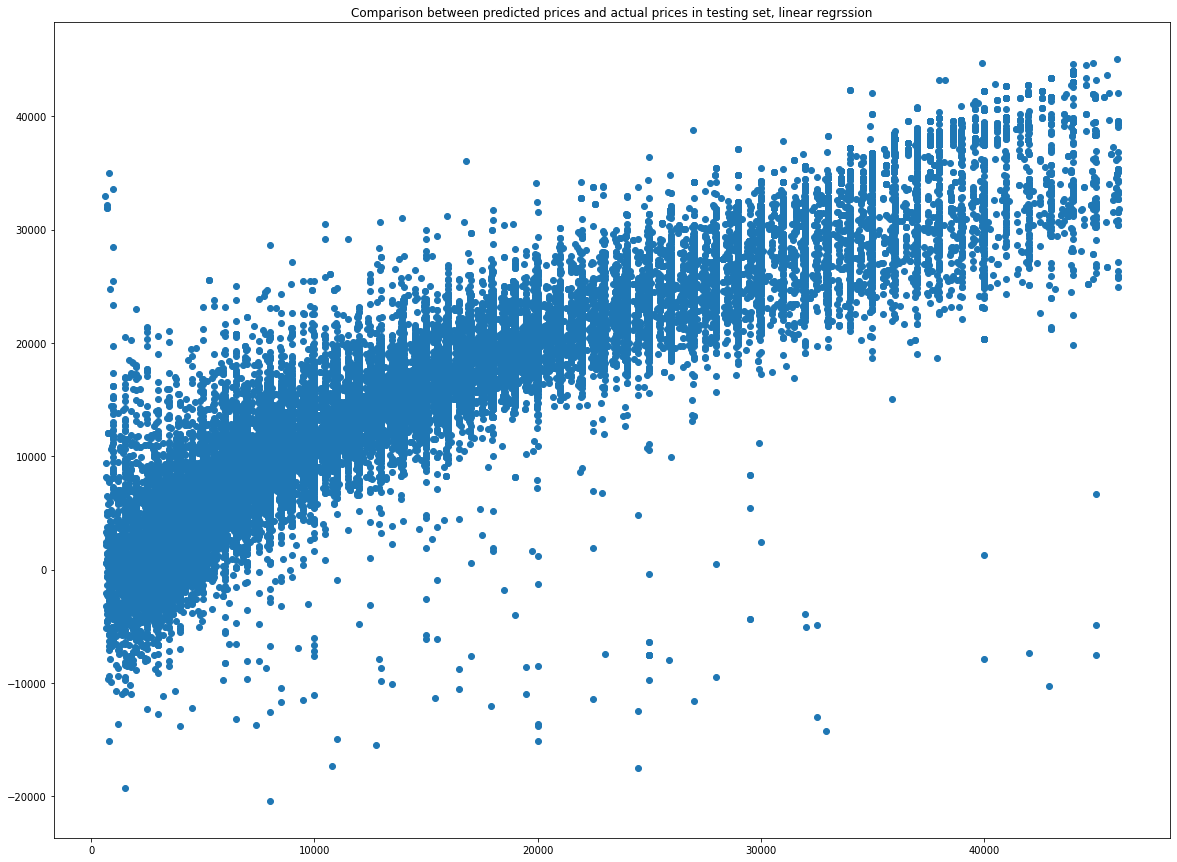

In [136]:
lr_predict = lrmodel.predict(X_test)

lr_r2 = metrics.r2_score(y_test, lr_predict)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_predict))

print('For the linear regressor, the root mean square error for the testing set is:', lr_rmse)
print('The r2 score for the testing set is:', lr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, linear regrssion')
plt.scatter(y_test, lr_predict);

### Linear Regression without Normalizing

In [137]:
X2_train, X2_test, y2_train , y2_test = train_test_split(xxdf.drop('price', axis = 1), xxdf['price'], test_size = 0.30, random_state = 141)

In [138]:
lrmodel2 = LinearRegression()
lrmodel2.fit(X2_train, y2_train) 

LinearRegression()

For the linear regressor, the root mean square error for the testing set is: 4105.138070976838
The r2 score for the testing set is: 0.8522435220190394


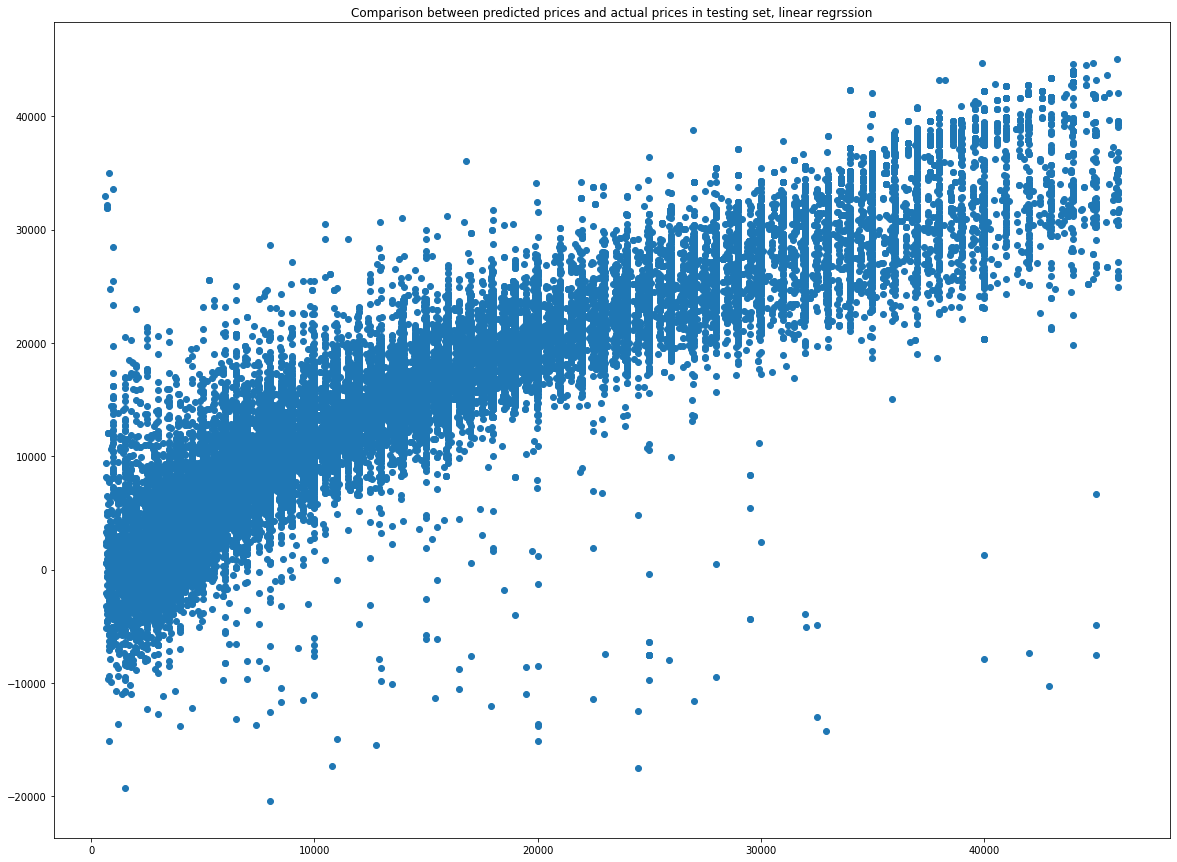

In [139]:
xlr_predict = lrmodel2.predict(X2_test)

xlr_r2 = metrics.r2_score(y2_test, xlr_predict)
xlr_rmse = math.sqrt(metrics.mean_squared_error(y2_test, xlr_predict))

print('For the linear regressor, the root mean square error for the testing set is:', xlr_rmse)
print('The r2 score for the testing set is:', xlr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, linear regrssion')
plt.scatter(y2_test, xlr_predict);

## Lasso Regression



In [140]:
from sklearn.linear_model import LassoCV

In [141]:
alphas = np.logspace(-4,4,12)
lasso = LassoCV(max_iter = 10**6, alphas = alphas)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 5.33669923e-04, 2.84803587e-03, 1.51991108e-02,
       8.11130831e-02, 4.32876128e-01, 2.31012970e+00, 1.23284674e+01,
       6.57933225e+01, 3.51119173e+02, 1.87381742e+03, 1.00000000e+04]),
        max_iter=1000000)

For the Lasso Linear regression, the root mean square error for the testing set is 4105.187280187077
The r2 score for the testing set is 0.8522399796177644


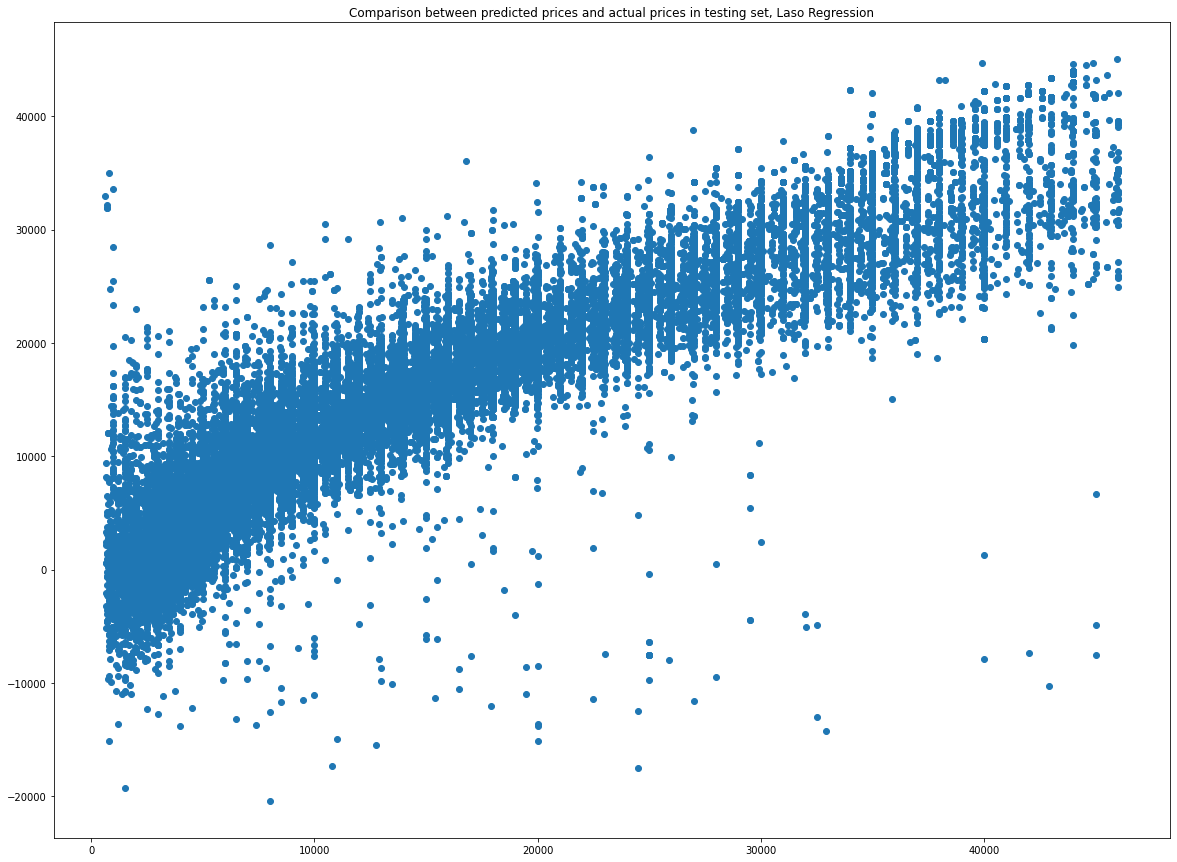

In [142]:
lasso_predict = lasso.predict(X_test)

lasso_r2 = metrics.r2_score(y_test, lasso_predict)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

model_score = model_score.append(pd.DataFrame({'r2':[lasso_r2],'rmse': [lasso_rmse]}, index = ['Lasso Regression']))

print("For the Lasso Linear regression, the root mean square error for the testing set is", lasso_rmse)
print("The r2 score for the testing set is", lasso_r2)

fig, ax = plt.subplots(figsize = (20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Laso Regression')
plt.scatter(y_test, lasso_predict);

### MLP (Fully Connected Neuron Network)

In [143]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [144]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout, Activation


In [145]:
import math

In [146]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [147]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
nn_model = Sequential()
nn_model.add(Dense(input_dim = X_train.shape[1], units = 2000, activation = 'relu'))
#nn_model.add(Dropout(0.3)) There seems to be no overfitting problem, so no need for dropout.
nn_model.add(Dense(units = 2000, activation = 'relu'))
nn_model.add(Dense(units=1))
nn_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mae', 'mse'])

In [148]:
nn_model.fit(X_train, y_train, batch_size=5000, epochs=800, callbacks=[callback], verbose=0)

For the MLP model, the root mean square error for the testing set is: 2474.4252983718443
The r2 score for the testing set is: 0.9463166403167225


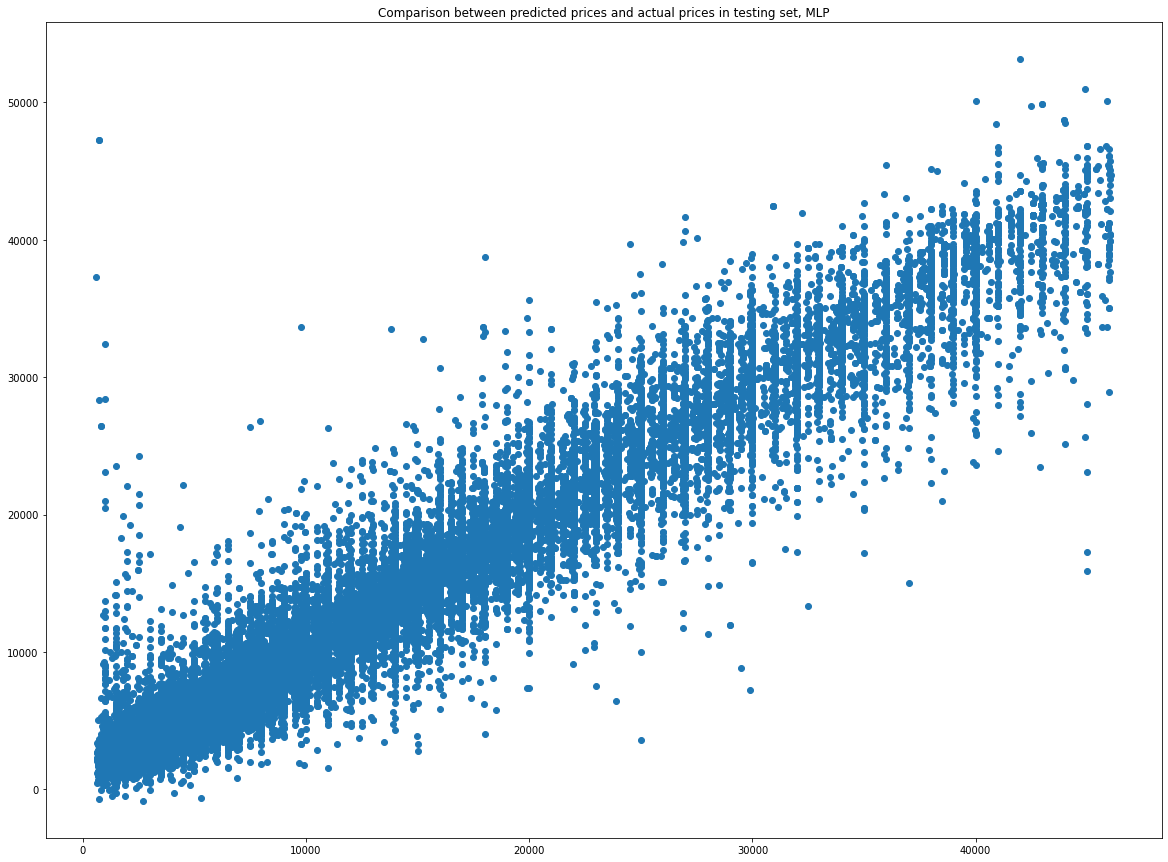

In [149]:
nn_predict = nn_model.predict(X_test)

nn_rmse = math.sqrt(metrics.mean_squared_error(y_test, nn_predict))
nn_r2 = metrics.r2_score(y_test, nn_predict)

model_score = model_score.append(pd.DataFrame({'r2':[nn_r2], 'rmse':[nn_rmse]}, index = ['MLP']))

print('For the MLP model, the root mean square error for the testing set is:', nn_rmse)
print('The r2 score for the testing set is:', nn_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, MLP')
plt.scatter(y_test, nn_predict)

### K-Nearest Neighbor



Sometimes KNN can achiever high accuracy, with the cost of time. As it is a type of "lazy study" model, the predicting time is very long even if the training is done.

We use <b> GridSearchCV() </b> to find the <b> best numbers of neighbors </b> via cross validation.

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
knnReg = KNeighborsRegressor()

param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,7)]
    }
]

grid_search_knn = GridSearchCV(knnReg, param_grid, n_jobs = -1, verbose = 2)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform']}],
             verbose=2)

In [56]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(n_neighbors=1)

For the K-NN regressor, the root mean square error for the testing set is: 3262.154320253352
The r2 score for the testing set is: 0.9066960570165434


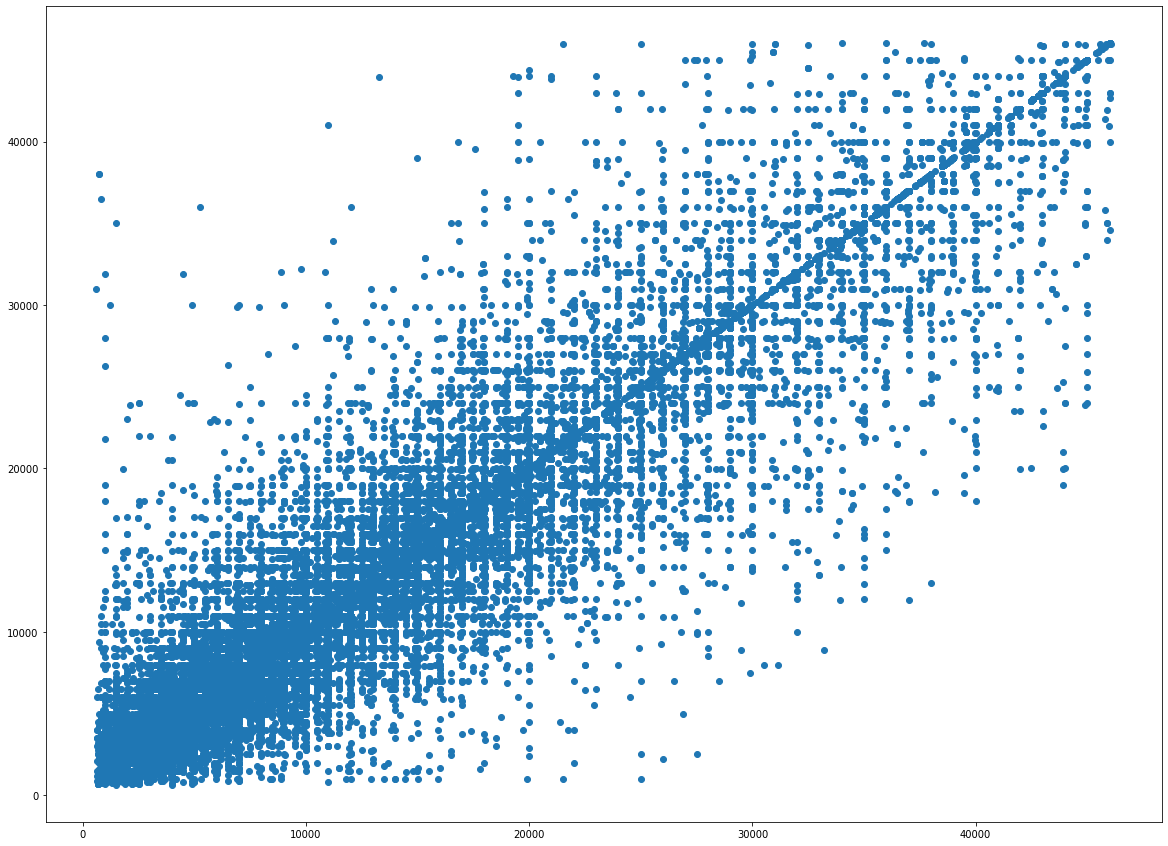

In [59]:
knn_predict = knn_best.predict(X_test)

knn_r2 = metrics.r2_score(y_test, knn_predict)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_predict))

model_score = model_score.append(pd.DataFrame({'r2': [knn_r2], 'rmse': [knn_rmse]}, index = ['K - Nearest Neighbor']))

print('For the K-NN regressor, the root mean square error for the testing set is:', knn_rmse)
print('The r2 score for the testing set is:', knn_r2)

fig, ax = plt.subplots(figsize = (20,15))
plt.scatter(y_test, knn_predict)

### Decision Tree

In the decision tree model, we did note set the maximal depth or leaf nodes.

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt_model = DecisionTreeRegressor(random_state = 0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

For the decision tree regressor, the root mean square error for the testing set is: 3133.1784253618866
The r2 score for the testing set is: 0.9139281281403054


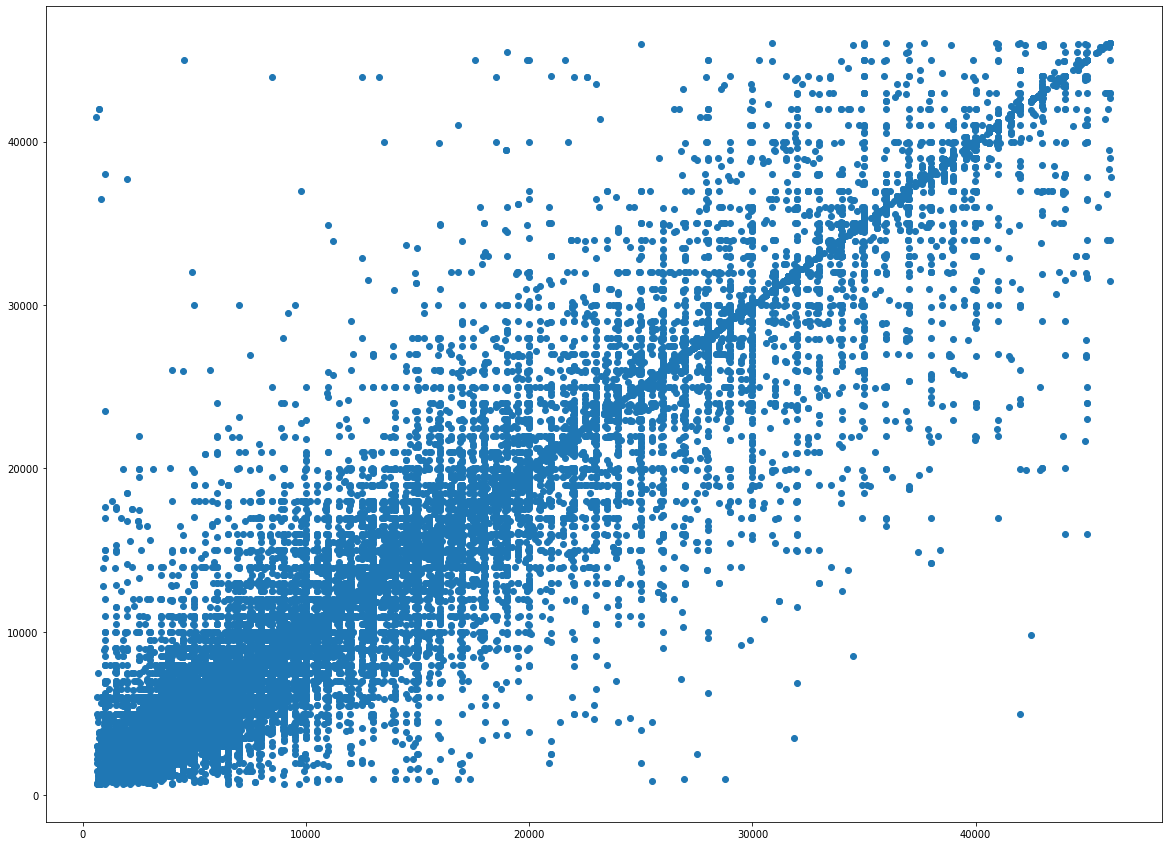

In [62]:
dt_predict = dt_model.predict(X_test)

dt_r2 = metrics.r2_score(y_test, dt_predict)
dt_rmse = math.sqrt(metrics.mean_squared_error(y_test, dt_predict))

model_score = model_score.append(pd.DataFrame({'r2': [dt_r2],'rmse':[dt_rmse]}, index = ['Decision Tree']))

print('For the decision tree regressor, the root mean square error for the testing set is:', dt_rmse)
print('The r2 score for the testing set is:', dt_r2)

fig, ax = plt.subplots(figsize = (20,15))
plt.scatter(y_test, dt_predict);

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rnf_model = RandomForestRegressor(max_depth = 8, random_state = 0)
rnf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

For the random Forest regressor, the root mean square error for the testing set is: 4407.318420735122
For the random Forest regressor, the r2 score is: 0.829690117064283


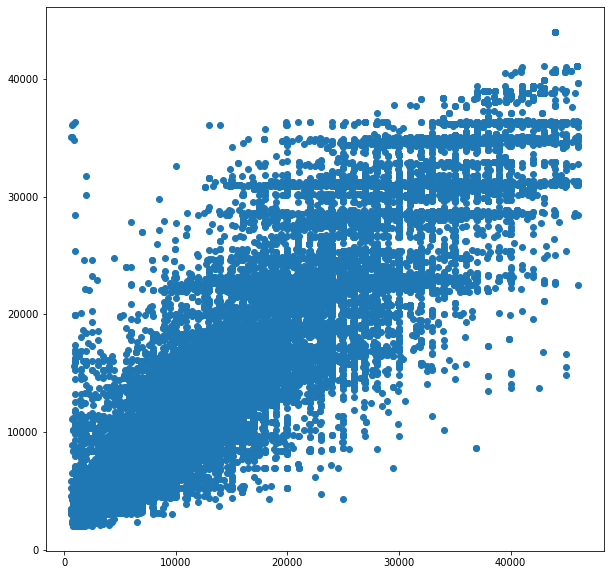

In [65]:
rnf_predict = rnf_model.predict(X_test)

rnf_r2 = metrics.r2_score(y_test, rnf_predict)
rnf_rmse = math.sqrt(metrics.mean_squared_error(y_test, rnf_predict))

model_score = model_score.append(pd.DataFrame({'r2': [rnf_r2], 'rmse':[rnf_rmse]}, index = ['Random Forest']))

print('For the random Forest regressor, the root mean square error for the testing set is:',rnf_rmse)
print('For the random Forest regressor, the r2 score is:', rnf_r2)

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(y_test, rnf_predict);

### Support Vector Machine

We try two different kernel for the support vector machine, Gaussian and linear

In [66]:
from sklearn.svm import SVR

In [67]:
svr_model = SVR(C = 1, epsilon = 0.2, kernel = 'rbf', max_iter = 10000)
svr_model.fit(X_train, y_train)

C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=1, epsilon=0.2, max_iter=10000)

For the Support vector regressor with gaussian kernel, the root mean square error for the testing set is: 10113.065971858976
The r2 score for the testing set is: 0.1032803764281528


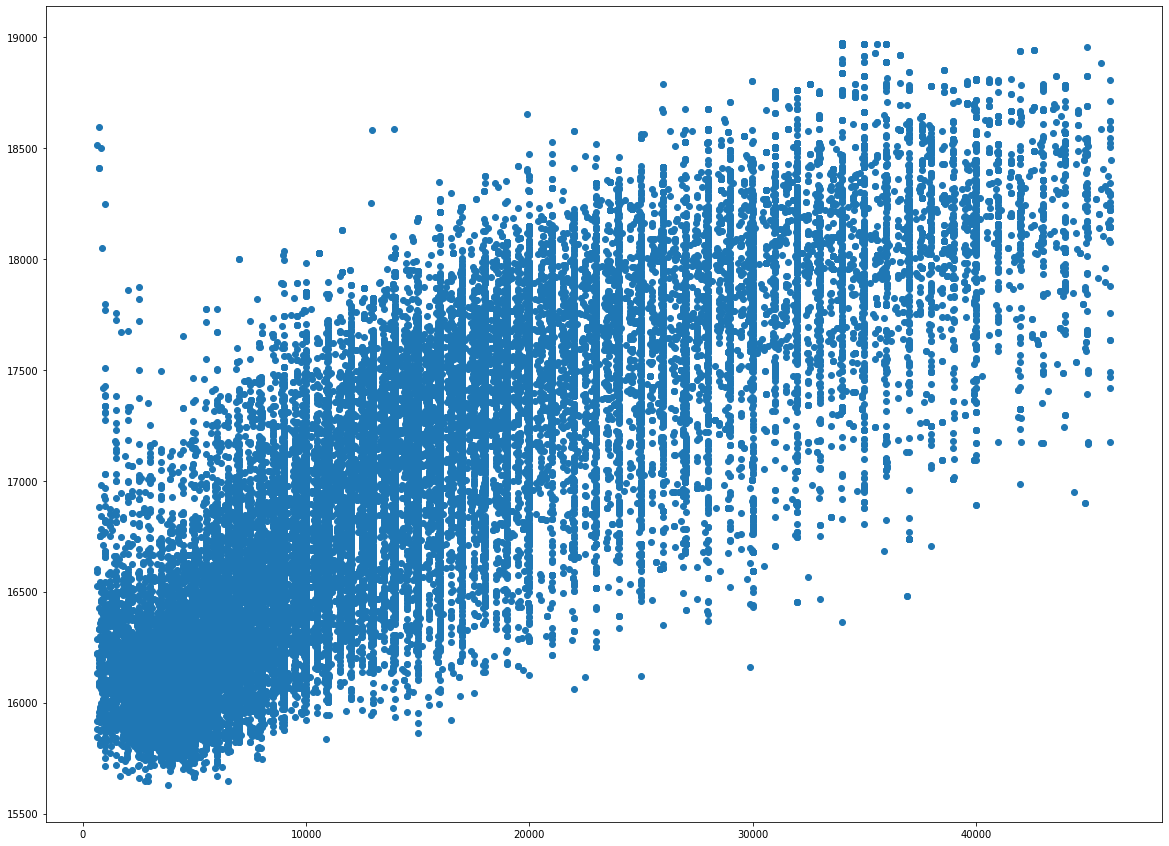

In [68]:
svr_predict = svr_model.predict(X_test)

svr_r2 = metrics.r2_score(y_test, svr_predict)
svr_rmse = math.sqrt(metrics.mean_squared_error(y_test, svr_predict))

model_score = model_score.append(pd.DataFrame({'r2':[svr_r2], 'rmse':[svr_rmse]}, index = ['SVM_gaus']))

print('For the Support vector regressor with gaussian kernel, the root mean square error for the testing set is:', svr_rmse)
print('The r2 score for the testing set is:', svr_r2)


fig, ax = plt.subplots(figsize = (20,15))
plt.scatter(y_test, svr_predict);

C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


For the support vector regressor with linear kernal, the root mean square for the testing set is: 6846.454720795494
The Root mean square is: 6846.454720795494


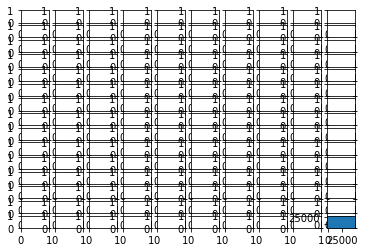

In [69]:
svr_model2 = SVR(C = 1, epsilon = 0.2, kernel = 'linear', max_iter = 10000)
svr_model2.fit(X_train, y_train)
svr_predict2 = svr_model2.predict(X_test)

svr2_r2 = metrics.r2_score(y_test, svr_predict2)
svr2_rmse = math.sqrt(metrics.mean_squared_error(y_test, svr_predict2))

model_score = model_score.append(pd.DataFrame({'r2': [svr2_r2], 'rmse':[svr2_rmse]}))

print('For the support vector regressor with linear kernal, the root mean square for the testing set is:', svr2_rmse)
print('The Root mean square is:', svr2_rmse)

fig, ax = plt.subplots(15,10)
plt.scatter(y_test, svr_predict2);

### XGBoost

In [70]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_model = XGBRegressor()

df_noDuplicate = xdf.loc[:, ~df.columns.duplicated()]

X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(df_noDuplicate.drop('price', axis = 1), xdf['price'], test_size = 0.30, random_state = 141)

xgb_model.fit(X_train_nd, y_train_nd)


In [ ]:

xgb_predict = xgb_model.predict(X_test_nd)
xgb_r2 = metrics.r2_score(y_test_nd, xgb_predict)
xgb_rmse = math.sqrt(metrics.mean_squared_error(y_test_nd, xgb_predict))

model_score = model_score.append(pd.DataFrame({'r2':[xgb_r2],'rmse':[xgb_rmse]}, index = ['XGBoost']))

print('For the XGboosting regressor, the root mean square : ', xgb_rmse)
print('The r2 score for the testing set is:', xgb_r2)
fig, ax = plt.subplots(figsize = (20,15))
plt.scatter(y_test_nd , xgb_predict);

## Evaluate and conclude

In [ ]:
model_score.sort_values(by = ['r2'], ascending = False)